<div class="alert alert-success h1" role="alert">
    <b> Introduction
</b>
<a class="anchor" id="intro"></a> </div>

We will try to predict the IMDB score for a dataset using a regression model. 

The columns of the train dataset are:

<center>

|Column Name|Column Description|
|:---|:-------|
|`id`|A unique identifier for each title.|
|`title`|The name of the title|
|`type`|The type of the title (e.g., movie, show)|
|`description`|The synopsis of the title|
|`release_year`|The year the title was released|
|`age_certification`|The age certification of the title|
|`runtime`|The runtime of the title|
|`seasons`|The number of seasons (relevant for shows)|
|`genres`|The list of genres of the title|
|`production_countries`|The list of countries where the title was produced|
|`streaming`|The streaming platform offering the title|
|`imdb_votes`| The number of IMDB votes the title has received |

</center>

<center>

In [1]:
#Data treatment
# ==============================================================================
import pandas as pd
import numpy as np
import ast
#Data visualization
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine learning
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score,train_test_split, RepeatedKFold, GridSearchCV, ParameterGrid
import json

#Warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

In [2]:
test_titles=pd.read_csv('C:/Users/josep/Downloads/Lights_camera_action_challenge/test_titles.csv')
train_titles=pd.read_csv('C:/Users/josep/Downloads/Lights_camera_action_challenge/train_titles.csv')

In [3]:
test_titles.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_votes,streaming
0,tm54590,Kansas,MOVIE,A drifter becomes both a bank robber and a her...,1988,R,110,"['drama', 'thriller', 'crime', 'romance']",['US'],NaN,1237,amazon
1,tm47969,Vibes,MOVIE,Medium Sylvia Pickel and psychometrist Nick De...,1988,PG,99,"['comedy', 'romance']",['US'],NaN,4828,amazon
2,tm124313,Full Moon High,MOVIE,A teenager becomes a werewolf after a family v...,1981,PG,93,"['horror', 'comedy', 'fantasy']",['US'],NaN,1536,amazon
3,tm120963,Girls Just Want to Have Fun,MOVIE,"Janey is new in town, and soon meets Lynne, wh...",1985,PG,87,"['romance', 'comedy', 'music']",['US'],NaN,12425,amazon
4,tm118428,One More Saturday Night,MOVIE,The problems faced by both teenagers and adult...,1986,R,95,['comedy'],['US'],NaN,328,amazon


In [4]:
test_titles.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_votes,streaming
0,tm54590,Kansas,MOVIE,A drifter becomes both a bank robber and a her...,1988,R,110,"['drama', 'thriller', 'crime', 'romance']",['US'],NaN,1237,amazon
1,tm47969,Vibes,MOVIE,Medium Sylvia Pickel and psychometrist Nick De...,1988,PG,99,"['comedy', 'romance']",['US'],NaN,4828,amazon
2,tm124313,Full Moon High,MOVIE,A teenager becomes a werewolf after a family v...,1981,PG,93,"['horror', 'comedy', 'fantasy']",['US'],NaN,1536,amazon
3,tm120963,Girls Just Want to Have Fun,MOVIE,"Janey is new in town, and soon meets Lynne, wh...",1985,PG,87,"['romance', 'comedy', 'music']",['US'],NaN,12425,amazon
4,tm118428,One More Saturday Night,MOVIE,The problems faced by both teenagers and adult...,1986,R,95,['comedy'],['US'],NaN,328,amazon


<div class="alert alert-success h1" role="alert">
    <b> Data Preprocessing
</b>
<a class="anchor" id="intro"></a> </div>

### Genres column

In [5]:
train_titles['genres'] = train_titles['genres'].apply(eval)
test_titles['genres'] = test_titles['genres'].apply(eval)
# Instantiate the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform the 'genres' column into a binary matrix
binary_matrix_train = mlb.fit_transform(train_titles['genres'])
binary_matrix_test = mlb.fit_transform(test_titles['genres'])

# Convert the binary matrix into a DataFrame with appropriate column names
binary_df_train = pd.DataFrame(binary_matrix_train, columns=mlb.classes_)
binary_df_test = pd.DataFrame(binary_matrix_test, columns=mlb.classes_)

# Reset the index for both 'train_titles' and 'test_titles'
train_titles.reset_index(drop=True, inplace=True)
test_titles.reset_index(drop=True, inplace=True)

# Concatenate 'test_titles' with 'binary_df_test'
train_titles_with_genres = pd.concat([train_titles, binary_df_train], axis=1)
test_titles_with_genres = pd.concat([test_titles, binary_df_test], axis=1)

train_titles=train_titles_with_genres
test_titles=test_titles_with_genres

### Production_countries column

In [6]:
train_titles['production_countries'] = train_titles['production_countries'].apply(eval)
# Instantiate the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the 'countries' column
binarized_countries = mlb.fit_transform(train_titles['production_countries'])

# Create a new DataFrame with the binarized countries
binarized_df = pd.DataFrame(binarized_countries, columns=mlb.classes_)

# Concatenate the new DataFrame with the original DataFrame
train_titles = pd.concat([train_titles, binarized_df], axis=1)

In [7]:
test_titles['production_countries'] = test_titles['production_countries'].apply(eval)
# Instantiate the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the 'countries' column
binarized_countries = mlb.fit_transform(test_titles['production_countries'])

# Create a new DataFrame with the binarized countries
binarized_df = pd.DataFrame(binarized_countries, columns=mlb.classes_)

# Concatenate the new DataFrame with the original DataFrame
test_titles = pd.concat([test_titles, binarized_df], axis=1)

In [8]:
train_titles=train_titles.drop(columns=['train_idx','id','title','description','genres','production_countries'], axis=1)
test_titles=test_titles.drop(columns=['title','description','genres','production_countries'], axis=1)

### Seasons

In [9]:
train_titles['seasons']=train_titles['seasons'].fillna(0)
test_titles['seasons']=test_titles['seasons'].fillna(0)

### Categorical predictors

In [10]:
train_titles['age_certification'].unique()

array(['G', 'TV-14', 'R', nan, 'PG', 'PG-13', 'NC-17', 'TV-PG', 'TV-G',
       'TV-Y7', 'TV-MA', 'TV-Y', 'TV-Y7-FV'], dtype=object)

In [11]:
# Encoding categorical predictors
train_titles= pd.get_dummies(train_titles, columns=['type', 'streaming', 'age_certification'])
test_titles = pd.get_dummies(test_titles, columns=['type', 'streaming','age_certification'])

# Model

In [12]:
# Get features for training
X = train_titles.drop(['target', 'imdb_score'], axis=1)
y = train_titles['imdb_score']

In [13]:
# Calculate the correlation between predictors and the target variable
corr_with_target = X.corrwith(y, method='pearson')
# Defining predictors with high/medium correlation
selected_predictors = corr_with_target[(corr_with_target > 0.05) | (corr_with_target < -0.05)]
X = X[selected_predictors.keys()]

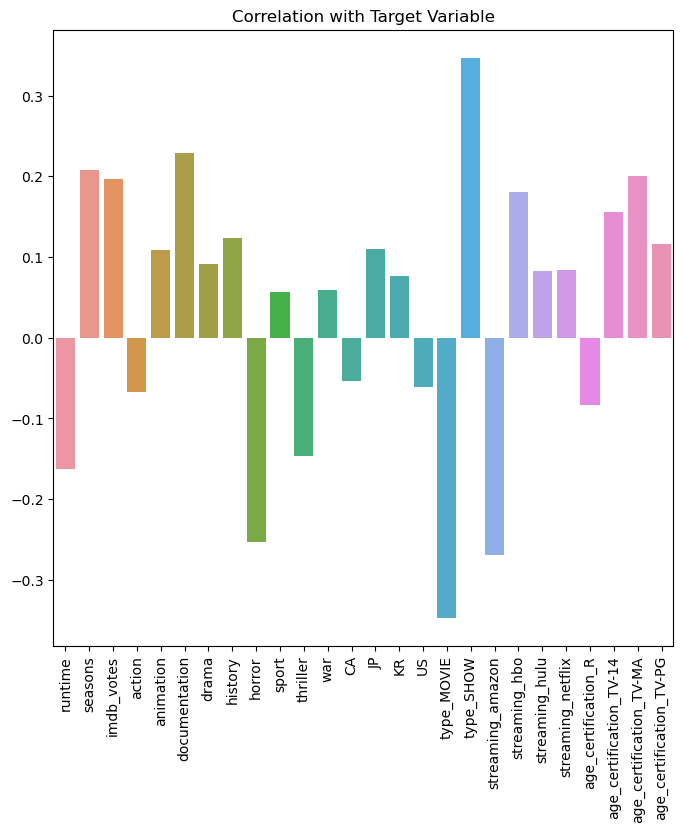

In [14]:
# Calculate the correlation between predictors and the target variable
corr_with_target = X.corrwith(y, method='pearson')
# Plot the correlation values
plt.figure(figsize=(8, 8))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values)
plt.xticks(rotation=90)
plt.title("Correlation with Target Variable")
plt.show()

In [15]:
# Split the data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

#Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Calculate evaluation metrics on the validation set
mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = mse_val**0.5

print(f"Mean Absolute Error (MAE) on Validation Set: {mae_val:.2f}")
print(f"Mean Squared Error (MSE) on Validation Set: {mse_val:.2f}")
print(f"Root Mean Squared Error (RMSE) on Validation Set: {rmse_val:.2f}")

Mean Absolute Error (MAE) on Validation Set: 0.73
Mean Squared Error (MSE) on Validation Set: 0.96
Root Mean Squared Error (RMSE) on Validation Set: 0.98


In [16]:
# Get features for training
X_test = test_titles[selected_predictors.keys()]
X_test.columns==X_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [17]:
# Retrain the model on the entire training data
model.fit(X, y)

RandomForestRegressor(random_state=42)

In [18]:
def get_imdb_score_class(score):
    if score < 2:
        return 0
    elif score < 3:
        return 1
    elif score < 4:
        return 2
    elif score < 5:
        return 3
    elif score < 6:
        return 4
    elif score < 7:
        return 5
    elif score < 8:
        return 6
    elif score < 9:
        return 7
    else:
        return 8

# Hyperparameters tuning

In [20]:
# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
}
# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=RepeatedKFold(n_splits=10, n_repeats=3, random_state=42), n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best GBR model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the validation set
y_val_pred = best_model.predict(X_val)

# Calculate evaluation metrics on the validation set
mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = mse_val ** 0.5

print(f"Mean Absolute Error (MAE) on Validation Set: {mae_val:.2f}")
print(f"Mean Squared Error (MSE) on Validation Set: {mse_val:.2f}")
print(f"Root Mean Squared Error (RMSE) on Validation Set: {rmse_val:.2f}")


Mean Absolute Error (MAE) on Validation Set: 0.71
Mean Squared Error (MSE) on Validation Set: 0.91
Root Mean Squared Error (RMSE) on Validation Set: 0.95


In [24]:
# Fit the model on the entire training data
best_model.fit(X, y)

RandomForestRegressor(max_depth=20, min_samples_split=20, n_estimators=200,
                      random_state=42)

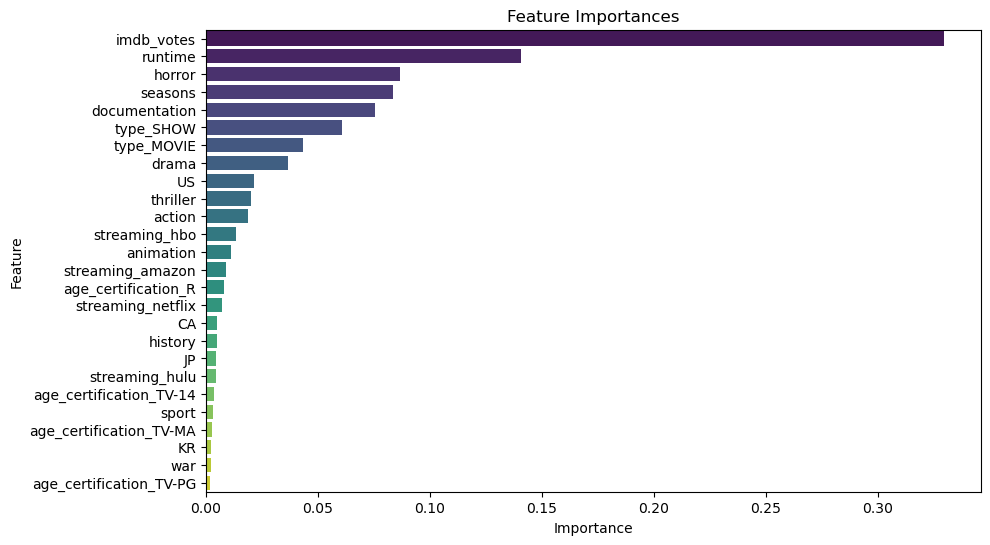

In [25]:
# Get feature importances from the best model
feature_importances = best_model.feature_importances_

# Create a DataFrame to hold the feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [27]:
# Make predictions on the test set
test_predictions = best_model.predict(X_test)
test_target_predictions = [get_imdb_score_class(score) for score in test_predictions]

# Create the predictions JSON file
predictions_dict = {"target": {i: test_target_predictions[i] for i in range(len(test_titles))}}

# Save predictions to a JSON file
with open("predictions.json", "w") as json_file:
    json.dump(predictions_dict, json_file)

print("Predictions saved to predictions.json")

Predictions saved to predictions.json


<div class="alert alert-success h1" role="alert">
    <b>Conclusions
</b>
<a class="anchor" id="intro"></a> </div>

We have implemented a regression model to predict the IMDB score. Prior to this, the data has been prepared, binarizing the categorical predictors, as well as replacing the NaN values. Finally, we have chosen the predictors by keeping only the predictors with a non-zero correlation with the IMDB score. Finally, we have performed hyperparameter tuning using GridSearchCV in order to find the best combination of hyperparameters that optimizes the performance of the model on the validation set. From the model, we may observe that the main predictors that determine the IMDB score are the imdb_votes, the runtime, the number of seasons, or whether the the title belong to the horror or documentary genre.  